In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
from tqdm import tqdm
from random import shuffle

In [2]:
pip install -q pyyaml h5py  

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_dir = '/content/drive/My Drive/Colab Notebooks/Faces/Train'
validation_dir = '/content/drive/My Drive/Colab Notebooks/Faces/Validation'

In [54]:
IMG_SIZE = 48
LR = 1e-3

MODEL_NAME = '/content/drive/My Drive/Colab Notebooks/Faces/model/facialexp-{}-{}.model'.format(LR, '6_conv-basic')

In [7]:
train_sad_dir='/content/drive/My Drive/Colab Notebooks/Faces/Train/sad'
validation_sad_dir = '/content/drive/My Drive/Colab Notebooks/Faces/Validation/sad'
train_happy_dir='/content/drive/My Drive/Colab Notebooks/Faces/Train/happy'
validation_happy_dir = '/content/drive/My Drive/Colab Notebooks/Faces/Validation/happy'
test_dir='/content/drive/My Drive/Colab Notebooks/Faces/test'
# img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Pan proj/test/test.jpg')

In [8]:
num_sad_tr = len(os.listdir(train_sad_dir))
num_happy_tr = len(os.listdir(train_happy_dir))

num_sad_val = len(os.listdir(validation_sad_dir))
num_happy_val = len(os.listdir(validation_happy_dir))


total_train = num_sad_tr + num_happy_tr
total_val = num_sad_val + num_happy_val

for sad [0,1]
for happy [1,0]

In [ ]:
def create_train_data():
  train_data=[]
  a=0
  for cat in os.listdir(train_dir):
    if cat=='sad': label=[0,1]
    elif cat=='happy': label=[1,0]
    path=os.path.join(train_dir,cat)
    for img in tqdm(os.listdir(os.path.join(train_dir,cat))):
      path_f=os.path.join(path,img)
      img=cv2.resize(cv2.imread(path_f,cv2.IMREAD_GRAYSCALE),(48,48))
      train_data.append([np.array(img),np.array(label)])
      if a==20:break
  shuffle(train_data)
  np.save('/content/drive/My Drive/Colab Notebooks/Faces/model/traindata.npy',train_data)
  # print(train_data[0:5])
  return train_data


In [ ]:
training_data = create_train_data()

In [8]:
training_data=np.load('/content/drive/My Drive/Colab Notebooks/Faces/model/train_and_test/traindata.npy',allow_pickle=True)
testing_data=np.load('/content/drive/My Drive/Colab Notebooks/Faces/model/train_and_test/test_data.npy',allow_pickle=True)

In [ ]:
print(len(training_data)//2)

6051


In [ ]:
print(training_data[0:10])
print(testing_data[10])
# shuffle(training_data)
# print(training_data[0:10])

In [9]:
class_names = ['Happy', 'Sad']


In [ ]:
print('total training cat images:', num_sad_tr)
print('total training dog images:', num_happy_tr)

print('total validation cat images:', num_sad_val)
print('total validation dog images:', num_happy_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


total training cat images: 4938
total training dog images: 7164
total validation cat images: 1139
total validation dog images: 1825
--
Total training images: 12102
Total validation images: 2964


In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 48
IMG_WIDTH = 48



In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
test_image_generator = ImageDataGenerator(rescale=1./255)

from down here


In [ ]:
!pip install tflearn

In [ ]:
!pip install tensorflow

In [16]:
from tensorflow.python.compiler.tensorrt import trt_convert

In [ ]:
!pip install tensorflow==1.15.3

In [18]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)



convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)



convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [15]:
train = training_data[:-6000]
test = training_data[-6000:]

In [16]:
X=np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y=[i[1] for i in train]

test_x=np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y=[i[1] for i in test]



In [19]:
model.fit({'input': X}, {'targets': Y}, n_epoch=15, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1439  | total loss: 0.14199 | time: 15.579s
| Adam | epoch: 015 | loss: 0.14199 - acc: 0.9418 -- iter: 6080/6102
Training Step: 1440  | total loss: 0.14281 | time: 20.223s
| Adam | epoch: 015 | loss: 0.14281 - acc: 0.9398 | val_loss: 0.67821 - val_acc: 0.8007 -- iter: 6102/6102
--


In [55]:
model.save(MODEL_NAME)

INFO:tensorflow:/content/drive/My Drive/Colab Notebooks/Faces/model/facialexp-0.001-6_conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


In [56]:
model.load(MODEL_NAME)

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/Faces/model/facialexp-0.001-6_conv-basic.model


[0.98623484 0.01376515]
[0.0576032 0.9423969]
[0.995732   0.00426797]
[0.01118964 0.9888103 ]
[0.54533595 0.4546641 ]
[0.06896629 0.9310337 ]
[0.9032772  0.09672279]
[0.3511406 0.6488594]
[9.9992263e-01 7.7364763e-05]
[0.06328924 0.9367107 ]
[0.8598181  0.14018193]
[0.04736608 0.95263386]
[9.990195e-01 9.805275e-04]
[0.994393   0.00560699]
[9.4512501e-04 9.9905485e-01]
[0.01857114 0.98142886]


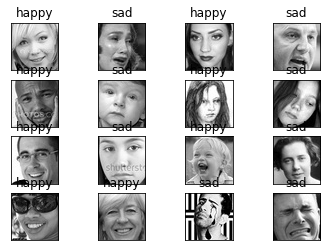

In [20]:
import matplotlib.pyplot as plt

# if you need to create the data:
#test_data = process_test_data()
# if you already have some saved:
# test_data = np.load('test_data.npy')

fig=plt.figure()

for num,data in enumerate(testing_data[:16]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(4,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    print(model_out)
    
    if np.argmax(model_out) == 1: str_label='sad'
    else: str_label='happy'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [35]:
img_path= '/content/drive/My Drive/Colab Notebooks/Faces/my_test/sad3.jpg'
test_data =  img=cv2.resize(cv2.imread(img_path,cv2.IMREAD_GRAYSCALE),(48,48))

# np.expand_dims(test_data, axis=0)

# test_data.reshape(IMG_SIZE,IMG_SIZE,1)
test_data = test_data.reshape(IMG_SIZE,IMG_SIZE,1)
test_data=np.reshape(test_data,[1,48,48,1])
model_out = model.predict(test_data)[0]



if np.argmax(model_out) == 1: str_label='sad'
else: str_label='happy'
print(model_out)
print(str_label)

[0.11850185 0.88149816]
sad


In [40]:
videoCaptureObject = cv2.VideoCapture(0)
result = True
while(result):
    ret,frame = videoCaptureObject.read()
    result = False
videoCaptureObject.release()
cv2.destroyAllWindows()

using webcam

In [53]:
save_path='/content/drive/My Drive/Colab Notebooks/Faces/model/compmodel'
tf.saved_model.save(model, save_path)


ValueError: ignored

None
